In [1]:
import sys
sys.path.insert(1, '/home/jovyan')
import util
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)

### Model

In [38]:
my_gs_path = 'gs://wx-57a8a73b-9e03-4f1d-9349-bf67bf6d9c2c/data/mmm_super_cat/2021-12-06-dhioe-test/predicted_selected/part_000000000001.parquet'
df = pd.read_parquet(my_gs_path)

In [39]:
DNS_PERC = 0.1

In [40]:
inc_sales_df = df[['crn', 'inc_sales']]
inc_sales_df = inc_sales_df.sort_values(by='inc_sales', ascending=False).reset_index(drop=True)
inc_sales_df['dummy'] = 1
inc_sales_df = inc_sales_df[:round((1-DNS_PERC)*len(inc_sales_df))]
inc_sales_df.drop(columns='inc_sales', inplace=True)

In [41]:
def update_dns(row):
    if row['dummy'] < 1:
        row['Category'] = 'None'
        row['Campaign_Seg_Grp_Id'] = 'None'
        row['template_id'] = 'dns'        
    return row

out = df.merge(inc_sales_df, how='left', left_on=['crn'], right_on=['crn'])
out['dummy'] = out['dummy'].fillna(0)
out = out.apply(lambda x: update_dns(x), axis=1)
out.drop(columns='dummy', inplace=True)

In [48]:
inc_sales_df = df[['crn', 'inc_sales']]
inc_sales_df = inc_sales_df.sort_values(by='inc_sales', ascending=False).reset_index(drop=True)

In [52]:
inc_sales_df.shift(-1)

crn   inc_sales
0     3300000000004544719  122.356777
1     3300000000002013026   86.766452
2     3300000000004610162   70.616125
3     1100000000009867088   56.318212
4     1100000000062736193   55.606060
...                   ...         ...
4056  1000000000002572849 -152.863562
4057  1000000000001071427 -161.136192
4058  1100000000002360343 -185.476487
4059  1100000000162488514 -217.461645
4060                  NaN         NaN

[4061 rows x 2 columns]

In [44]:
import matplotlib.pyplot as plt
fig_df = out[out['template_id'] != 'dns'][['inc_sales']].sort_values('inc_sales', ascending=False).reset_index(drop=True)

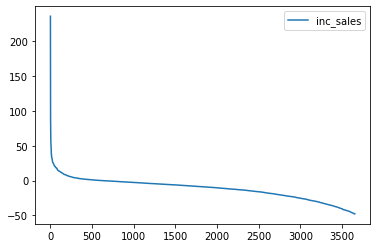

In [46]:
ya = fig_df.plot()

### Random

In [22]:
my_gs_path = 'gs://wx-57a8a73b-9e03-4f1d-9349-bf67bf6d9c2c/data/mmm_super_cat/2021-12-06-dhioe-test/ranking_no/part_000000000001.parquet'
df = pd.read_parquet(my_gs_path)

In [26]:
df['dummy'] = np.random.choice(
    a=np.array([0, 1]),
    size=len(df),
    p=[
        DNS_PERC,
        1.0 - DNS_PERC,
    ],
)

In [27]:
out = df.apply(lambda x: update_dns(x), axis=1)
out.drop(columns='dummy', inplace=True)

In [28]:
out

crn            Category Campaign_Seg_Grp_Id  \
0     3300000000000591327          Toiletries              SG-012   
1     1100000000154767574          Toiletries              SG-012   
2     1100000000004696213  International Food              SG-014   
3     1100000000148707939          Dishwasher              SG-013   
4     1100000000002643259             Produce              SG-001   
...                   ...                 ...                 ...   
1029  1100000000085717060             Produce              SG-001   
1030  1100000000143047491  International Food              SG-014   
1031  1100000000156425573               Dairy              SG-010   
1032  1100000000010120096                None                None   
1033  3300000000002075586               Fruit              SG-003   

               template_id  target_spd     p_rdm    base_spd  inc_sales  \
0     CAT-4298_20211214_12   29.854684  0.018646   42.633551 -12.778868   
1     CAT-4298_20211214_12   48.972447  0.001405   62.669120 -13.696674   
2     CAT-4298_20211214_14   74.391827  0.002584  113.806994 -39.415167   
3     CAT-4298_20211214_13   24.481640  0.003105   28.949092  -4.467452   
4      CAT-4298_20211214_1    6.449185  0.001062    8.119026  -1.669841   
...                    ...         ...       ...         ...        ...   
1029   CAT-4298_20211214_1    3.180358  0.000804    3.684261  -0.503903   
1030  CAT-4298_20211214_14    7.969899  0.000907   11.783574  -3.813676   
1031  CAT-4298_20211214_10   10.012702  0.003071    8.401792   1.610910   
1032                   dns    5.980349  0.001042    6.810853  -0.830504   
1033   CAT-4298_20211214_3   12.063643  0.000990   14.392489  -2.328846   

      p_inc_sales  target_cost target_group  
0       -0.238269     0.013916       RANDOM  
1       -0.019243     0.001720       RANDOM  
2       -0.101846     0.004806       RANDOM  
3       -0.013872     0.001900       RANDOM  
4       -0.001774     0.000171       RANDOM  
...           ...          ...          ...  
1029    -0.000405     0.000064       RANDOM  
1030    -0.003458     0.000181       RANDOM  
1031     0.004948     0.000769       RANDOM  
1032    -0.000865     0.000156       RANDOM  
1033    -0.002304     0.000298       RANDOM  

[1034 rows x 11 columns]